<a href="https://www.kaggle.com/code/taf1404/heart-disese?scriptVersionId=147896678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Preparing tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve
from sklearn.metrics import precision_score, f1_score, recall_score

In [2]:
df = pd.read_csv('../input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [3]:
df.shape

(297, 14)

In [4]:
df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

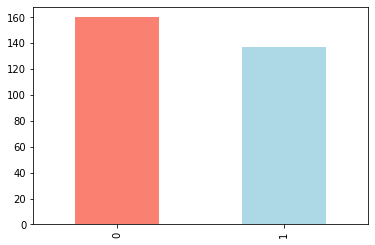

In [5]:
df['condition'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [9]:
df.sex.value_counts()

1    201
0     96
Name: sex, dtype: int64

In [10]:
# compare condition column with sex column
pd.crosstab(df.condition,df.sex)

sex,0,1
condition,,
0,71,89
1,25,112


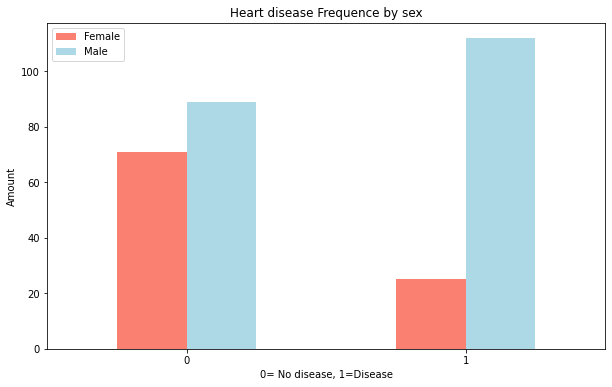

In [11]:
pd.crosstab(df.condition,df.sex).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue']);

plt.title('Heart disease Frequence by sex')
plt.xlabel('0= No disease, 1=Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

 # Age vs Max heart rate for heart disease

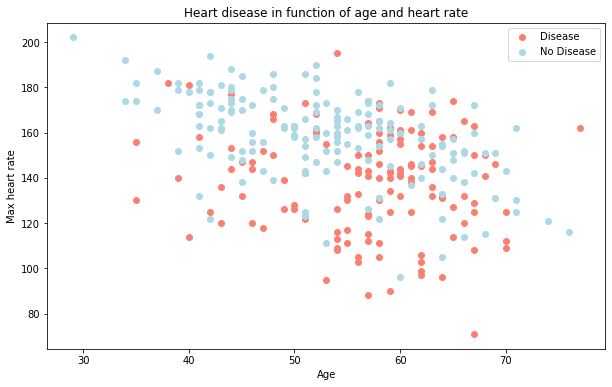

In [12]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.condition==1], df.thalach[df.condition==1],color='salmon')
plt.scatter(df.age[df.condition==0], df.thalach[df.condition==0],color='lightblue')

plt.title('Heart disease in function of age and heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease','No Disease']);

<AxesSubplot:ylabel='Frequency'>

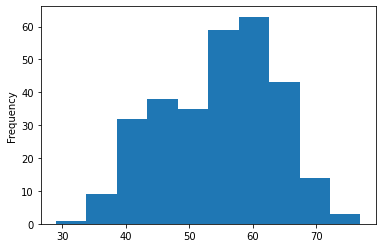

In [13]:
df.age.plot(kind='hist')

# heart disease frequency per chest pain type

In [14]:
pd.crosstab(df.cp,df.condition)

condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


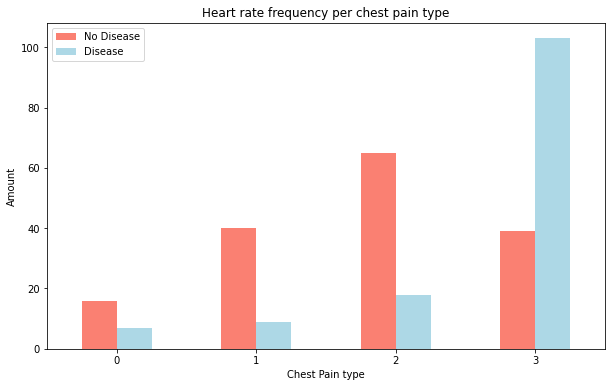

In [15]:
pd.crosstab(df.cp,df.condition).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])

plt.title('Heart rate frequency per chest pain type')
plt.ylabel('Amount')
plt.xlabel('Chest Pain type')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

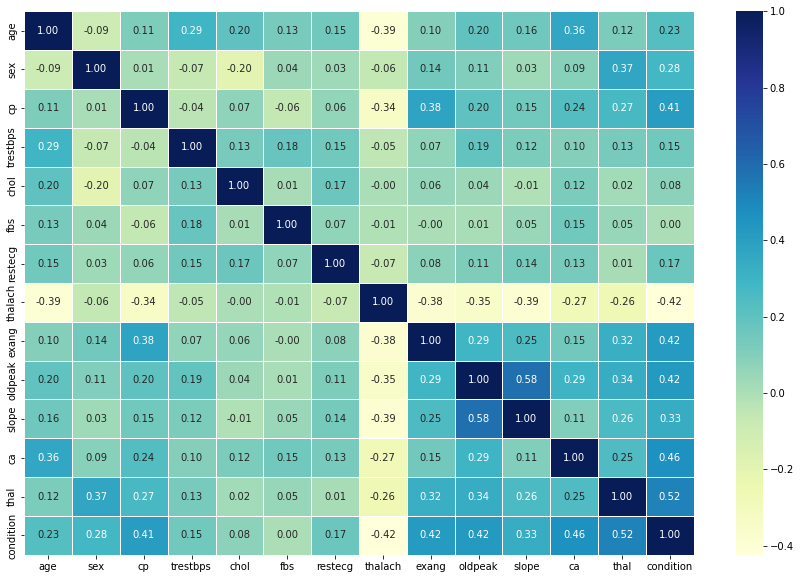

In [16]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

# 5. Modelling

In [17]:
# split data into X and y
X = df.drop('condition',axis=1)
y = df['condition']

In [18]:
# split into train and test
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
# put models in dictionary 
models = {'Logistic Regression': LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# create a function to fit and score our models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    
    return model_scores

In [20]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'Logistic Regression': 0.7333333333333333,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.7}

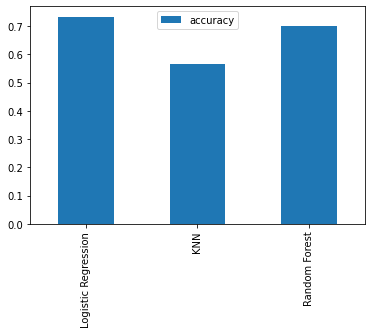

In [21]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

# Hyperparemeter tuning

In [22]:
# Improve KNN
train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    
    test_scores.append(knn.score(X_test,y_test))

In [23]:
test_scores

[0.5166666666666667,
 0.5333333333333333,
 0.48333333333333334,
 0.5333333333333333,
 0.5666666666666667,
 0.55,
 0.55,
 0.5166666666666667,
 0.5833333333333334,
 0.5666666666666667,
 0.6166666666666667,
 0.6,
 0.5833333333333334,
 0.5833333333333334,
 0.6166666666666667,
 0.6166666666666667,
 0.6166666666666667,
 0.6,
 0.6,
 0.6]

Maximum KNN score on the test data: 61.67%


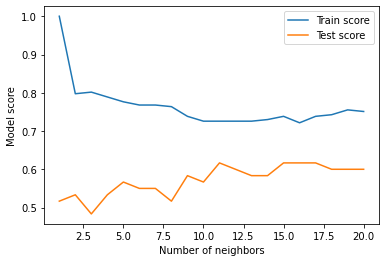

In [24]:
plt.plot(neighbors,train_scores, label='Train score')
plt.plot(neighbors,test_scores, label='Test score')
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

## hyperparameter tuning with RandomizedSearchCV

In [25]:
# hyperparameter grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4,4,20),
               'solver': ['liblinear']}

# hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth': [None,3,5,10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}

In [26]:
np.random.seed(42)

# setup random hyperparameter search for the Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

# fitting
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [28]:
rs_log_reg.score(X_test,y_test)

0.7333333333333333

In [29]:
np.random.seed(42)

# setup random hyperparameter search for the Random Forest
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

# fitting
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [31]:
rs_rf.score(X_test,y_test)

0.7333333333333333

## Hyperparameter tuning using with GridSearchCV

In [32]:
gs_log_reg = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [34]:
gs_log_reg.score(X_test,y_test)

0.7333333333333333

## Evaluating a model

In [35]:
y_preds = gs_log_reg.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


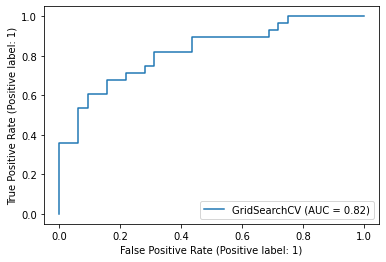

In [36]:
plot_roc_curve(gs_log_reg,X_test,y_test)

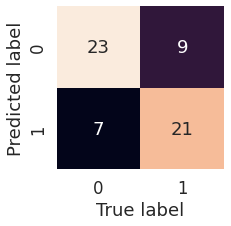

In [37]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
plot_conf_mat(y_test,y_preds)

In [38]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [39]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

## calculate evaluation metrics with cross-validation

In [40]:
clf = LogisticRegression(C=0.08858667904100823,solver='liblinear')


In [41]:
# cross validated accuracy
cv_acc = np.mean(cross_val_score(clf,X,y,cv=5,scoring='accuracy'))
cv_acc

0.8420903954802259

In [42]:
# cross validated precision
cv_precision = np.mean(cross_val_score(clf,X,y,cv=5,scoring='precision'))
cv_precision

0.8918514588859416

In [43]:
# cross validated recall score
cv_recall = np.mean(cross_val_score(clf,X,y,cv=5,scoring='recall'))
cv_recall

0.7690476190476191

In [44]:
# cross validated f1-score
cv_f1 = np.mean(cross_val_score(clf,X,y,cv=5,scoring='f1'))
cv_f1

0.7986451979004114

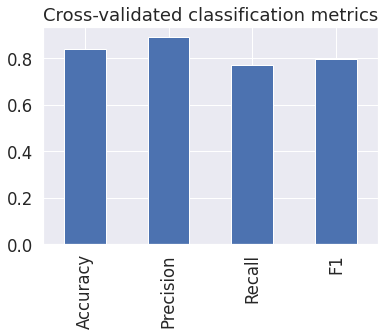

In [45]:
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                          'Precision':cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1},index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification metrics',legend=False);

# Feature importance

In [46]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [47]:
clf.coef_

array([[-0.01575558,  0.56288141,  0.27877318,  0.01871588,  0.00378119,
        -0.12665077,  0.22588852, -0.03607805,  0.27712481,  0.39885815,
         0.12417271,  0.69851053,  0.67393429]])

In [48]:
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.015755575633921656,
 'sex': 0.5628814072522961,
 'cp': 0.2787731846568726,
 'trestbps': 0.018715882181713158,
 'chol': 0.00378119259701454,
 'fbs': -0.126650773391413,
 'restecg': 0.22588852387790442,
 'thalach': -0.036078048789863655,
 'exang': 0.27712481465499794,
 'oldpeak': 0.3988581538186339,
 'slope': 0.12417270705287467,
 'ca': 0.6985105297238806,
 'thal': 0.67393429082568}

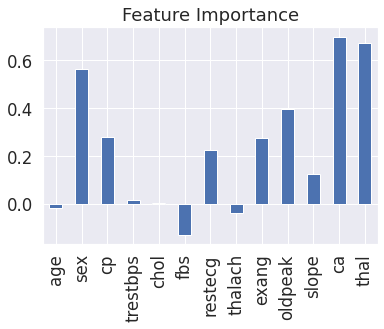

In [49]:
# visualize
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False);